<a href="https://colab.research.google.com/github/Jadia-Ewing/MA413_Project_Code/blob/main/MA413_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MA413 Final Project Group 5: Jadia Ewing, Anayah Smith, Isabel Tejada, Victoria Gaibor**

**Read in Dataset from Github**

In [15]:
#IMPORT ANY PACKAGES USED FOR THIS PROJECT SO THEY CAN BE CITED IN THE PAPER EASY

%matplotlib inline
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#Data handling
import pandas as pd
import numpy as np
#Modeling & Evaluation (Classification + Regression)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#Regression Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Classification Models (if needed)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # (Same name, but different from regressor)
#Classification Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
#Model interpretation
from sklearn.inspection import DecisionBoundaryDisplay
#Stats tools
from scipy.stats import uniform


In [7]:
#Clone my github directory to allow anyone to access the files used in this code

#Remove the previous MA413_Project_Code to allow github to reclone
#This allows changes to be made to github and be re-read
!rm -r MA413_Project_Code/

#Clone the directory temporarily into this notebook to read files from
!git clone 'https://github.com/Jadia-Ewing/MA413_Project_Code.git'

Cloning into 'MA413_Project_Code'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 340.94 KiB | 17.94 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [8]:
#Read in the white wine dataset that was imported from GITHUB + inspect Data
white_wine = pd.read_csv('MA413_Project_Code/Project_Files/WhiteWineData.csv')
print(white_wine.info())
print(white_wine.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.00000

***Visualize the Data***

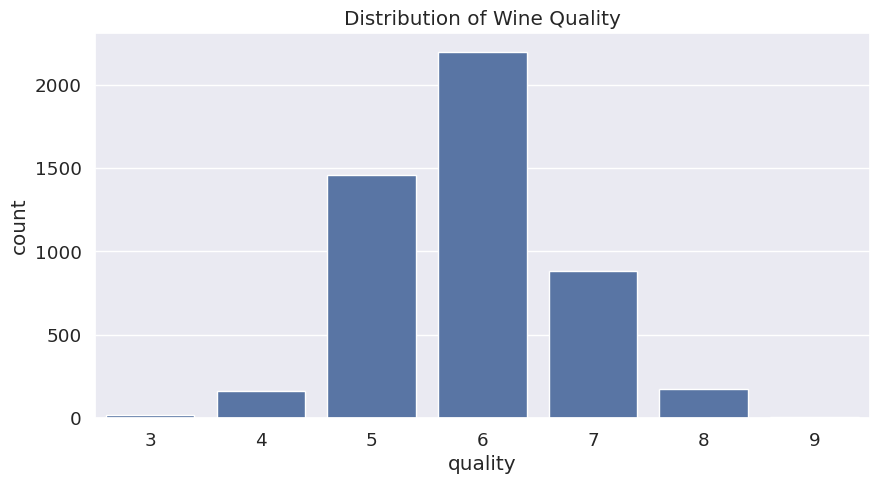

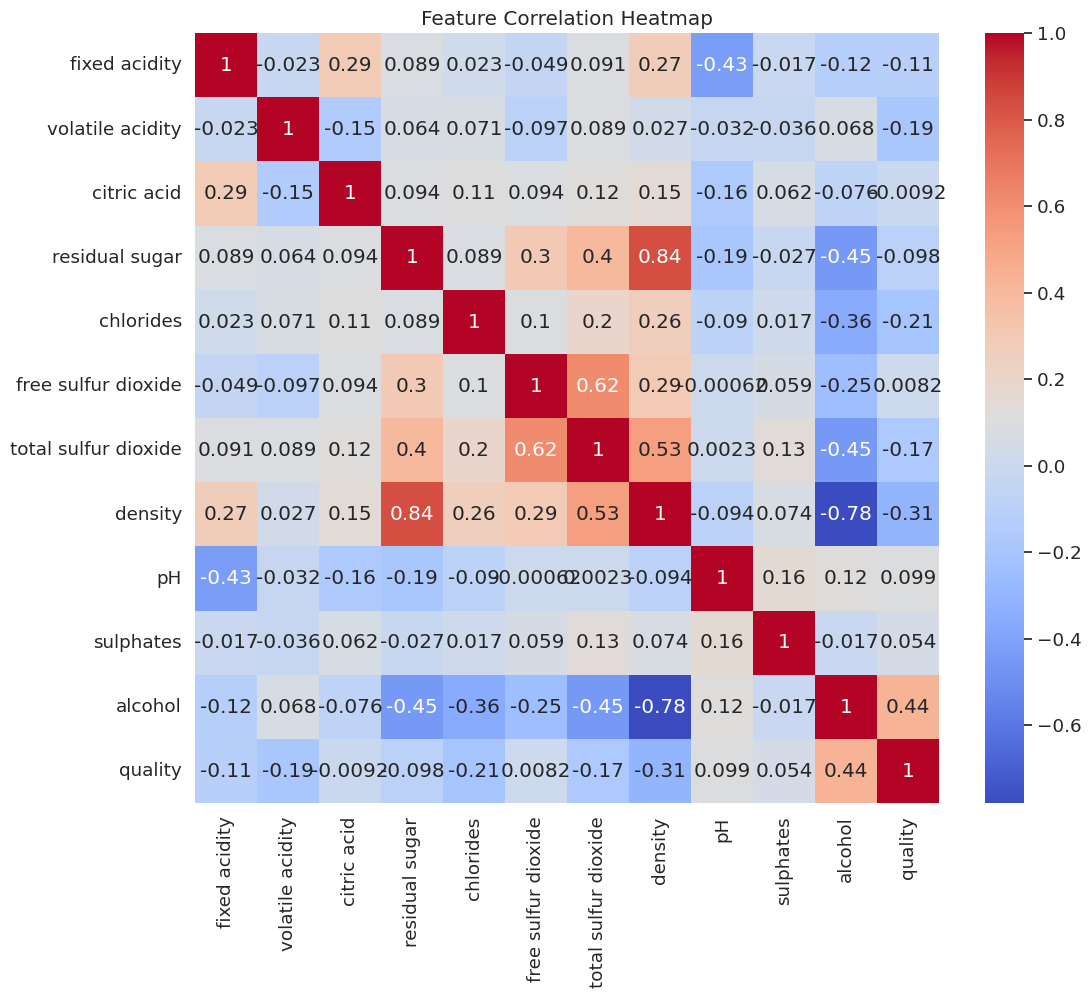

In [16]:
 #Exploratory Data Analysis (EDA)

plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=white_wine)
plt.title("Distribution of Wine Quality")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(white_wine.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
#Define Features and Target
X = white_wine.drop('quality', axis=1)
y = white_wine['quality']

#Train-Test Split + Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
#Model Training and Evaluation
def evaluate_model(name, y_test, y_pred):
    return {
        'Model': name,
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

results = []

***Fitting Linear Regression Model + Polynomial Regression (Degrees 2 & 3)***

In [19]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results.append(evaluate_model('Linear Regression', y_test, y_pred_lr))

In [20]:
#Polynomial Regression (Degrees 2 & 3)
for degree in [2, 3]:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    results.append(evaluate_model(f'Polynomial (deg {degree})', y_test, y_pred))

***Implementing Machine Learning Methods***

In [21]:
#Support Vector Regression (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
results.append(evaluate_model('SVR (RBF)', y_test, y_pred_svr))

In [22]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
results.append(evaluate_model('Random Forest', y_test, y_pred_rf))

In [23]:
#Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
results.append(evaluate_model('Gradient Boosting', y_test, y_pred_gb))

***Comparing Visuals + Results***

In [24]:
#Model Comparison Table

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df.sort_values(by='R2', ascending=False))


Model Performance Summary:
                Model        R2       MSE       MAE
4       Random Forest  0.550367  0.348228  0.419531
5   Gradient Boosting  0.403392  0.462057  0.536183
3           SVR (RBF)  0.391952  0.470917  0.516481
0   Linear Regression  0.265275  0.569025  0.586267
1  Polynomial (deg 2)  0.200268  0.619371  0.566984
2  Polynomial (deg 3) -1.368956  1.834692  0.616883


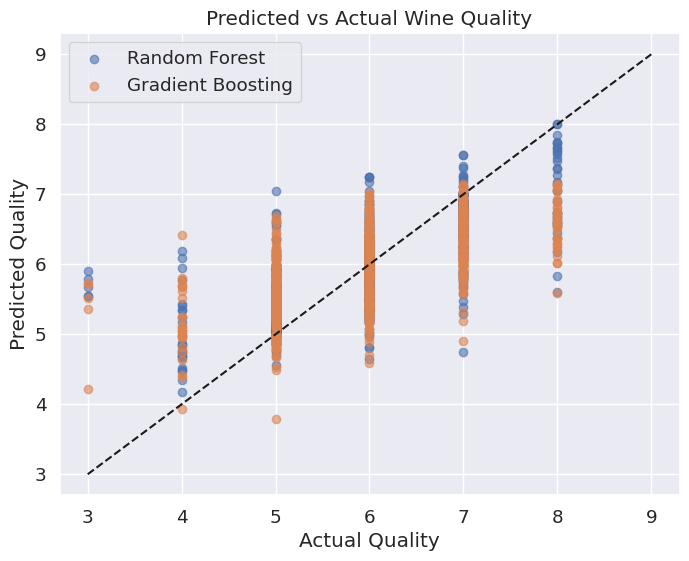

In [25]:
#Visualize Predictions vs Actual

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_pred_gb, alpha=0.6, label='Gradient Boosting')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual Wine Quality")
plt.legend()
plt.grid(True)
plt.show()

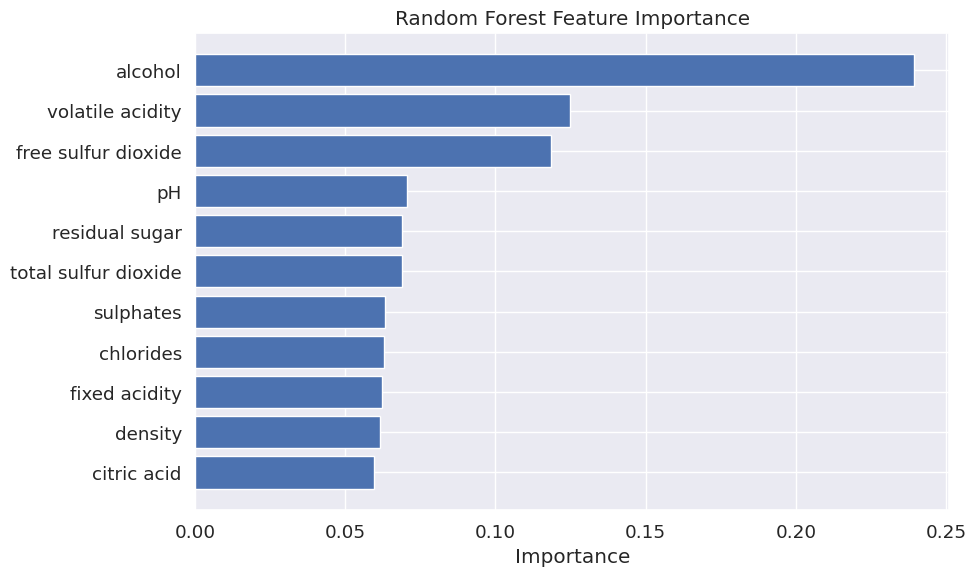

In [26]:
#Feature Importance from Random Forest

importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()